In [7]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [8]:
# import numpy as np
print(np.__file__)


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/numpy/__init__.py


In [9]:
sys.executable


'/home/rfpred/envs/rfenv/bin/python3.11'

In [10]:
# !{sys.executable} -m pip list

In [11]:
import funcs.rf_tools

diarreeklont


In [12]:
# import all the functions within imgproc.py


from funcs.rf_tools import (get_dat, calculate_sigma, calculate_pRF_location, prf_plots_new, prf_plots, make_visrois_dict, 
                            make_gaussian_2d, make_circle_mask, css_gaussian_cut, roi_filter, write_prf_dict, 
                            get_mask, compare_masks, compare_heatmaps, prf_heatmap, get_img_prf, rsquare_selection, nsd_R2_dict)
from funcs.utility import print_dict_structure
from funcs.imgproc import show_stim

In [13]:
# !pip list
# !conda list

In [14]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))

In [15]:
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

In [16]:
prf_dict = write_prf_dict(binary_masks = vismask_dict)
# print_dict_structure(prf_dict)

In [17]:
R2_dict = nsd_R2_dict(vismask_dict)

Create dictionary for top n R2 explained variance voxels, both for the prf and nsd stimuli separately.

In [88]:
prf_rsq_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects, dataset = 'prf')
nsd_rsq_dict = rsquare_selection(R2_dict, 1000, n_subjects = n_subjects, dataset = 'nsd')

# print_dict_structure(rsq_dict)

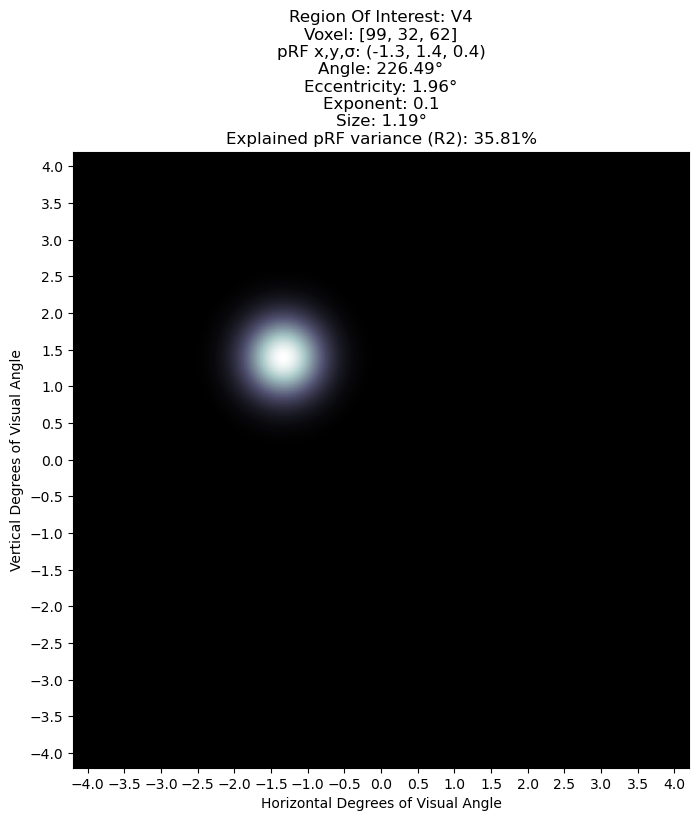

In [13]:
prf_info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='gaussian', roi='V4',
                                        plot = 'y', excl_reason = 'n', sigma_min=.1, sigma_max = 4.2)


mask
x
y
pix_radius
deg_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2


0.56261

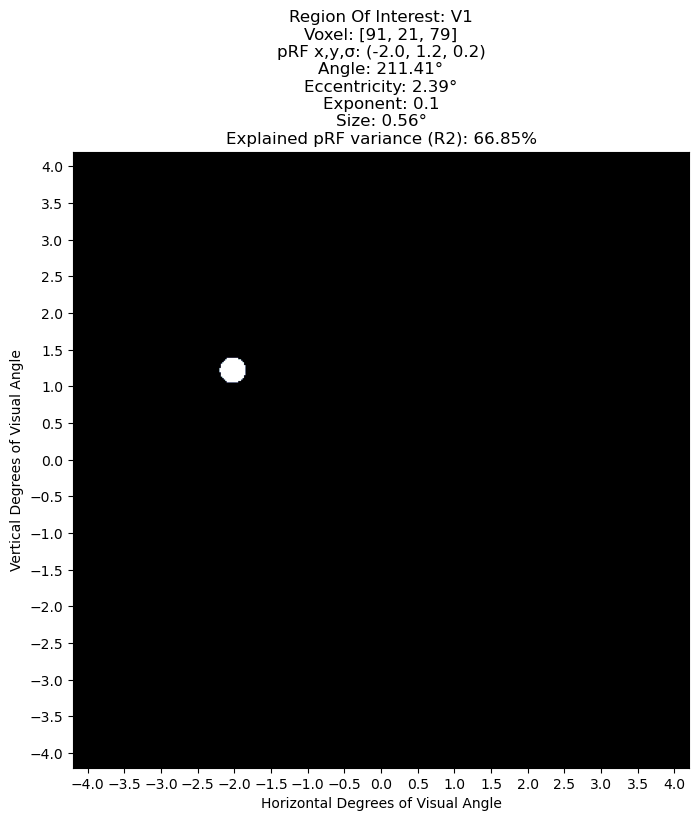

In [14]:
stront = get_mask(dim=425, subject='subj01', binary_masks = vismask_dict, 
                prf_proc_dict=prf_dict, type='circle', roi='V1',
                plot='y', excl_reason='n', sigma_min=.1, sigma_max=4.2, rand_seed=None)

print_dict_structure(stront)

stront['size']

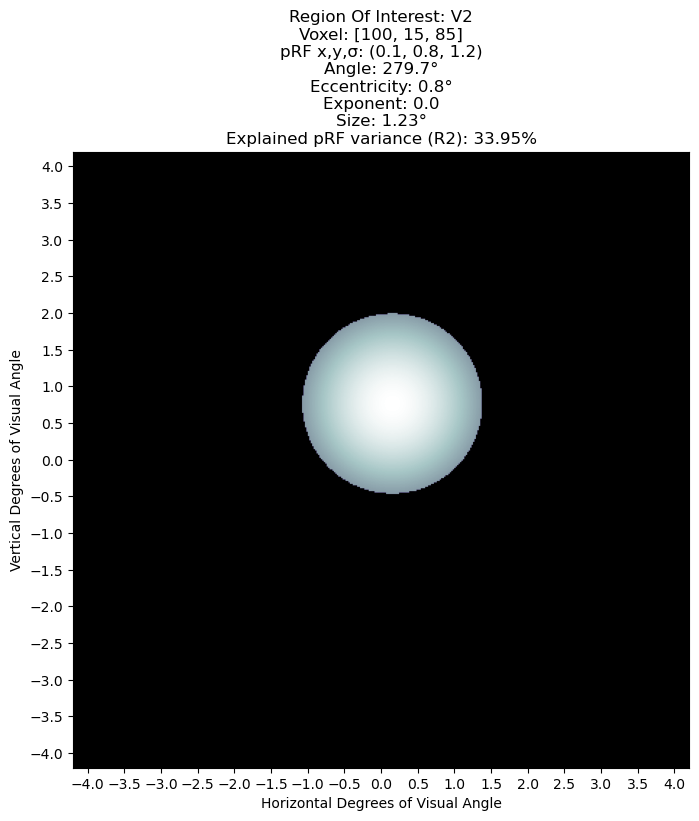

In [15]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2, rand_seed=11)


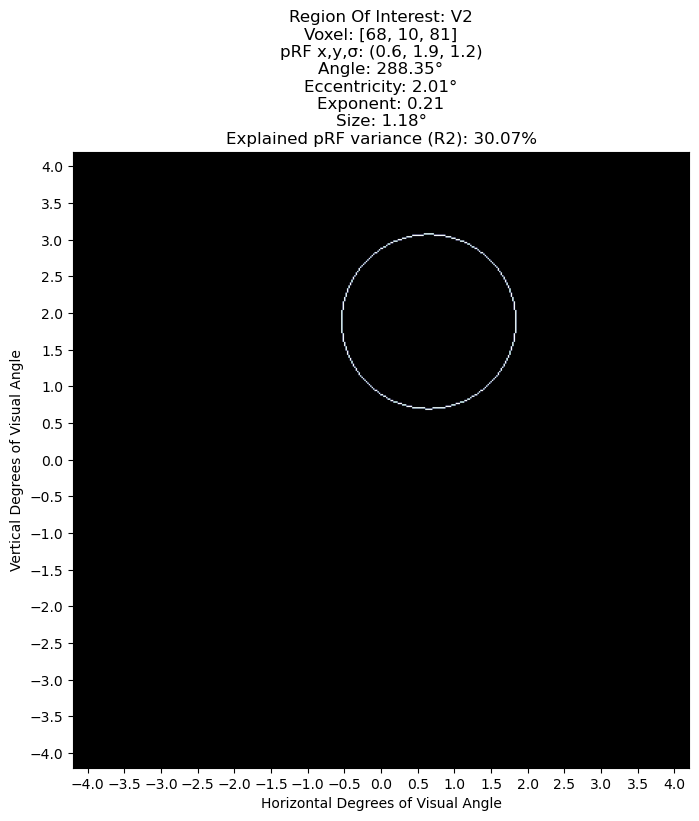

In [16]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2)


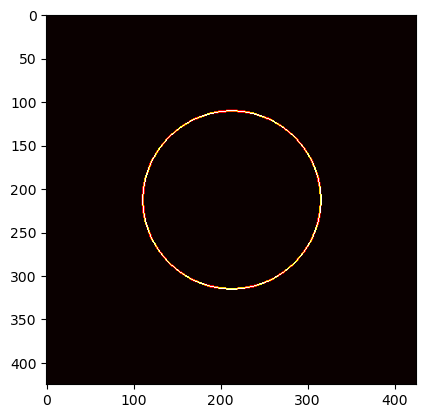

In [17]:
import matplotlib.pyplot as plt

# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n', margin_width = 2)

plt.imshow(zirkel, cmap = 'hot')
plt.show()
# with np.printoptions(threshold=np.inf):
#     print(zirkel)v

mask
x
y
pix_radius
deg_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2

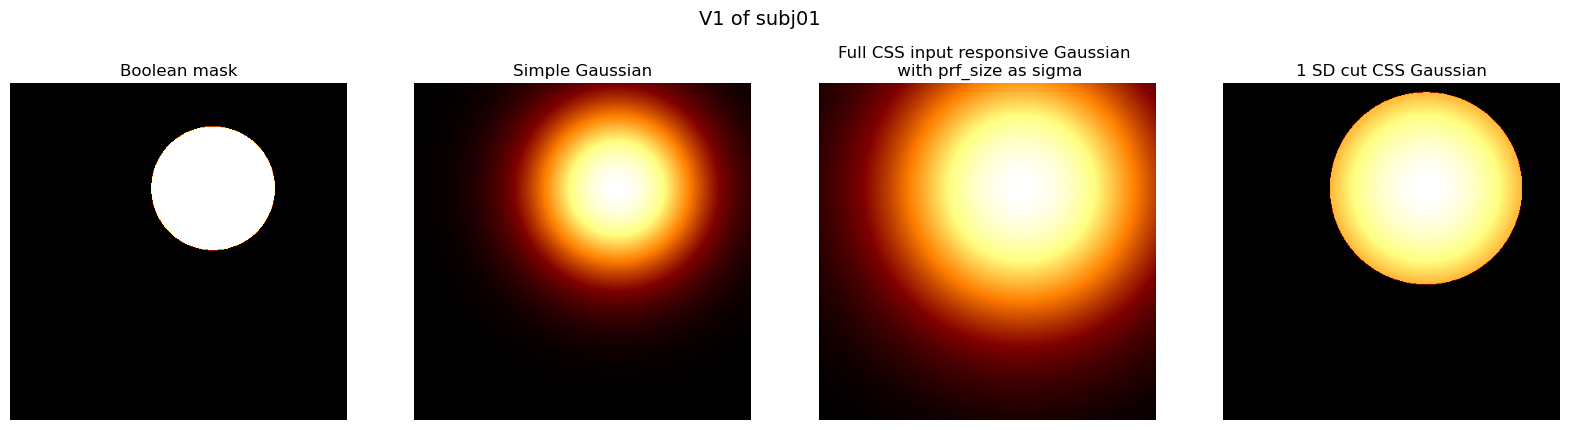

In [18]:
compare_masks(mask_dict =  vismask_dict, prf_dict = prf_dict)

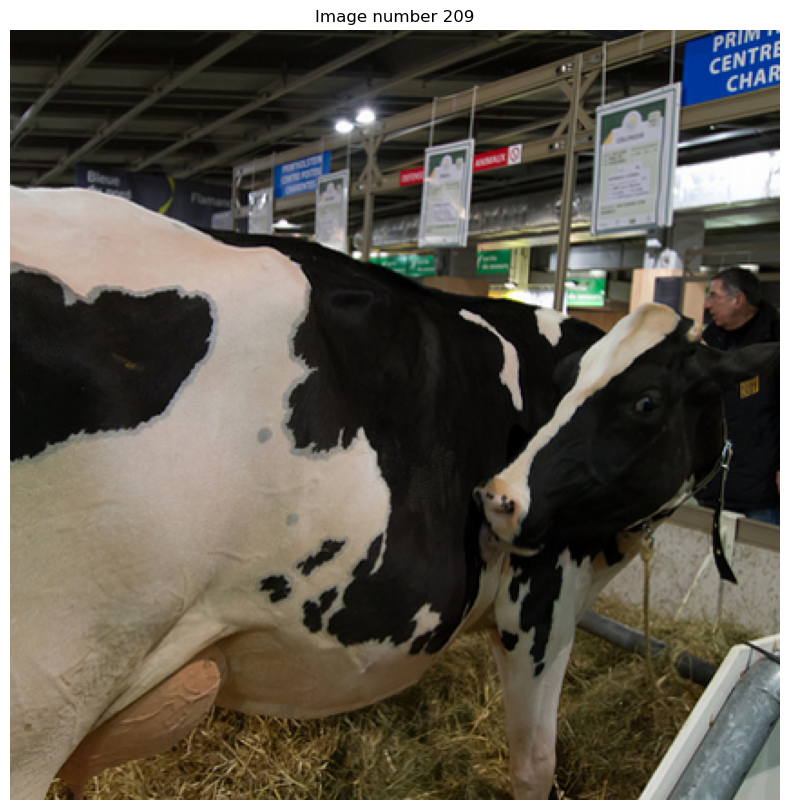

In [19]:
stim_img, img_no = show_stim(img_no = 209)

In [5]:
# This function applies a gaussian filter to the loaded image
def get_img_prf(image, x = None, y = None, sigma = None, type = 'gaussian', heatmask = None, 
                binary_masks = None, prf_proc_dict = None, roi = 'V1', sigma_min=1, sigma_max=25, 
                rand_seed = None, invert = 'n', central = 'n', filter_dict = None, grid = 'n'):
    # arguments can be specified manually, or generated randomly if none are given
    # when entered manually there is no specification of parameters (yet)
    # I have to think about whether this is actually relevant, don't think so.
    # It's nothing more than a check whether it works, which it does.

    masked_arr = np.zeros(image.shape) # Create empty array for masked image
    if type == 'heatmask':
        # prf_mask = np.mean(heatmask, axis=2)
        prf_mask = heatmask
    else:
        if x is None and y is None and sigma is None:
            prf_info = get_mask(dim = image.shape[0], subject = 'subj01', plot = 'n', 
                                binary_masks = binary_masks, prf_proc_dict = prf_proc_dict, 
                                type = type, sigma_min=sigma_min, sigma_max=sigma_max, 
                                rand_seed = rand_seed, filter_dict = filter_dict, grid = grid)

        
        x, y, sigma = prf_info['x'], prf_info['y'], prf_info['pix_radius']
        masked_arr = np.zeros(image.shape) # Create empty array for masked image

        pix_radius = sigma #* (image.shape[0]/8.4)
        
        if central == 'y':
            x = y = ((image.shape[0] + 1) / 2)
            pix_radius = (2 * (image.shape[0] / 8.4))

            
        if type == 'gaussian':
            prf_mask = make_gaussian_2d(image.shape[0], x, y, pix_radius)
        elif type == 'circle':
            prf_mask = make_circle_mask(image.shape[0], x, y, pix_radius)
        elif type == 'full_gaussian':
            prf_mask = make_gaussian_2d(image.shape[0], x, y, pix_radius)
        elif type == 'cut_gaussian':
            prf_mask = css_gaussian_cut(image.shape[0], x, y, pix_radius)
        elif type == 'outline':
            prf_mask = (make_circle_mask(image.shape[0], x, y, pix_radius, fill = 'n'))
        else:
            raise ValueError(f"Invalid type: {type}. Available mask types are 'gaussian','circle','full_gaussian','cut_gaussian', and 'outline'.")

    # Apply the mask per layer of the input image using matrix multiplication
    for colour in range(image.shape[2]):
        if invert == 'n':
            # masked_arr[:,:,colour] = image[:,:,colour] * np.flipud(prf_mask)
            masked_arr[:,:,colour] = image[:,:,colour] * np.flipud(prf_mask)
        elif invert == 'y':
            masked_arr[:,:,colour] = image[:,:,colour] * np.flipud(1 - prf_mask)
            

    # Normalize the masked image according to the RGB range of 0-255
    masked_img = masked_arr / 255

    # ax.imshow(masked_img, origin='upper', extent=[0,image.shape[0],0,image.shape[0]])
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(masked_img, origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
    # ax.set_title(f'Region Of Interest: {roi}\n')
    ax.set_xlabel('Horizontal Degrees of Visual Angle')
    ax.set_ylabel('Vertical Degrees of Visual Angle')


    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(prf_mask, cmap='bone', origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
    ax.set_title(f'Region Of Interest: {roi}\n'
                f'Voxel: [{prf_info["x_vox"]}, {prf_info["y_vox"]}, {prf_info["z_vox"]}]\n'
                f'pRF x,y,σ: {round(prf_info["x_deg"], 1), round(prf_info["y_deg"], 1), round(prf_info["deg_radius"], 1)}\n'
                f'Angle: {round(prf_info["angle"], 2)}°\nEccentricity: {round(prf_info["eccentricity"], 2)}°\n'
                f'Exponent: {round(prf_info["exponent"], 2)}\nSize: {round(prf_info["size"], 2)}°\n'
                f'Explained pRF variance (R2): {round(prf_info["R2"], 2)}%')
    ax.set_xlabel('Horizontal Degrees of Visual Angle')
    ax.set_ylabel('Vertical Degrees of Visual Angle')

# f'Voxel: [{prf_info["x_vox"]}, {prf_info["y_vox"]}, {prf_info["z_vox"]}]\n'


    # Set ticks at every 0.1 step
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
    return prf_info



In [6]:
prf_details = get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = 1.0, 
            sigma_max = 2, rand_seed=None, invert='n', central = 'n', grid = 'y')


print(prf_details['size'])

NameError: name 'show_stim' is not defined

141

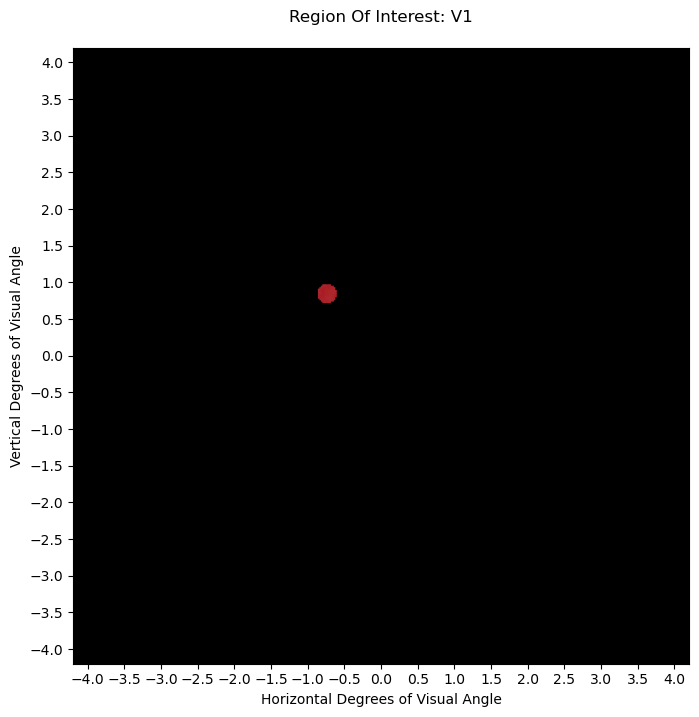

In [21]:


a = get_img_prf(show_stim(hide='y')[0], type='circle', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 2, central='n', invert='n')

np.sum(a['mask'])

# natural-scenes-dataset/nsddata_timeseries/ppdata/subj01/func1mm/design

In [ ]:
import cv2
img,_ = show_stim(hide = 'y')
# print(type(img))
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

contrast = img_grey.std()
# print(np.asarray(img))
print(contrast)

52.434323624460426


In [107]:

def calculate_rms(arr):
    """
    Calculate the Root Mean Square (RMS) of a NumPy array.

    Parameters:
    - arr (numpy.ndarray): Input array.

    Returns:
    - float: RMS value.
    """
    return np.sqrt(np.mean(np.square(arr)))

# Create a 10x10 checkerboard array
mx = np.zeros((10, 10), dtype=int)

# Set alternate rows and columns to 1
mx[1::2, ::2] = 1
mx[::2, 1::2] = 1


# mx = np.ones((10,10))

with np.printoptions(threshold=np.inf):
    print(mx)
    
mx.std()

calculate_rms(mx)

[[0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]]


0.7071067811865476

Okao nice this works, but I need to do this for every subj and every roi separately, so best to do it inside the heatmap function, as this one maps over that anyway, or well, it doesn't yet over the rois, but I can probably add that.

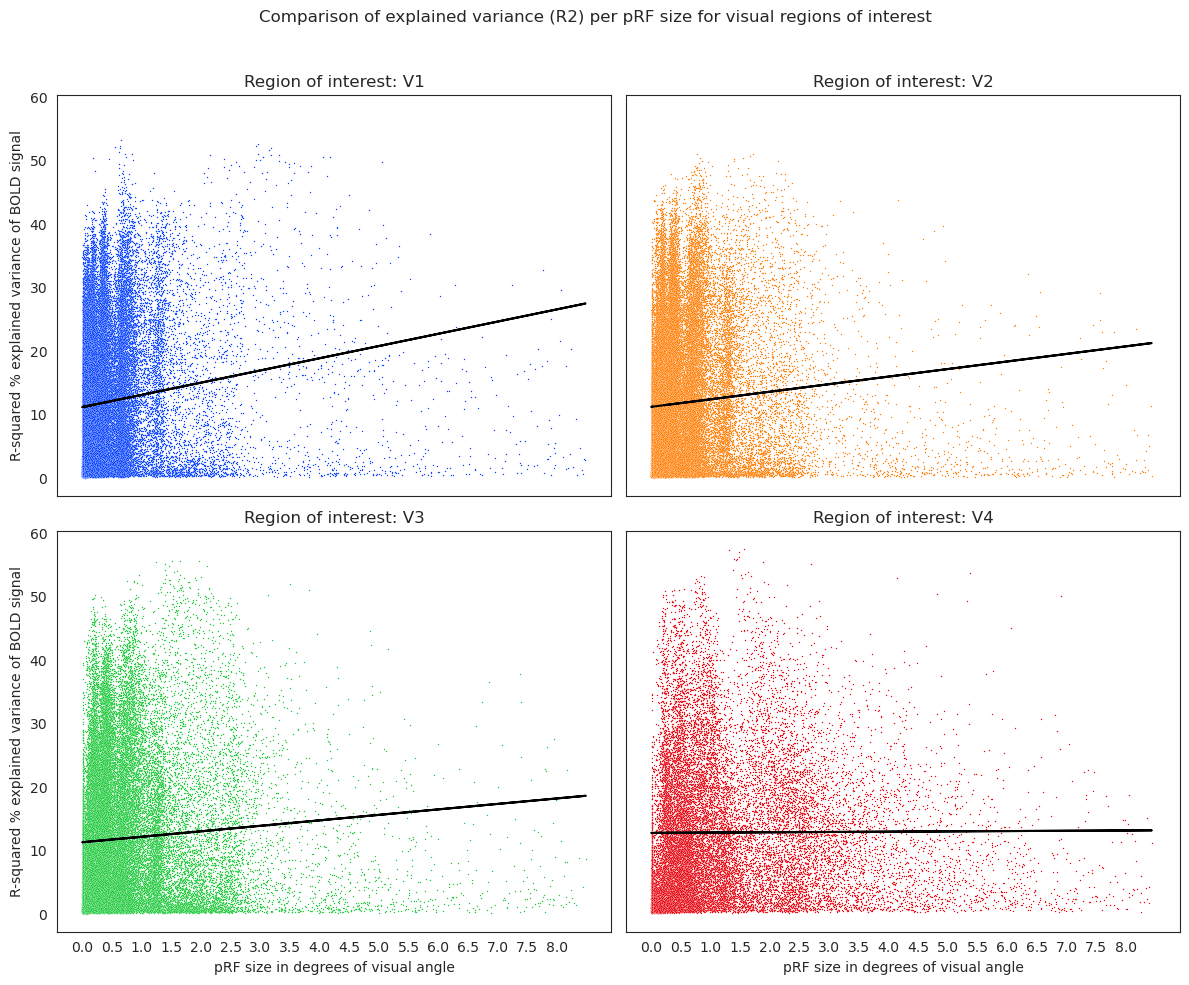

In [87]:
# plt.scatter(nsd_rsq_dict['subj01']['V1_mask'][:,3], len(nsd_rsq_dict['subj01']['V1_mask'][:,3]))


nsd_rsq_full = nsd_R2_dict(vismask_dict)

print(np.max(nsd_rsq_full['subj01']['R2_roi']['V1_mask'][:,3]))

# print(len(nsd_rsq_dict['subj01']['V1_mask'][:,3]))

48.11262


In [52]:
print(type(df['RSQ'][0][0]))

<class 'numpy.float64'>


Subject: subj01, Voxel 1 out of 7887 found
Subject: subj01, Voxel 2 out of 7887 found
Subject: subj01, Voxel 3 out of 7887 found
Subject: subj01, Voxel 4 out of 7887 found
Subject: subj01, Voxel 5 out of 7887 found
Subject: subj01, Voxel 6 out of 7887 found
Subject: subj01, Voxel 7 out of 7887 found
Subject: subj01, Voxel 8 out of 7887 found
Subject: subj01, Voxel 9 out of 7887 found
Subject: subj01, Voxel 10 out of 7887 found
Subject: subj01, Voxel 11 out of 7887 found
Subject: subj01, Voxel 12 out of 7887 found
Subject: subj01, Voxel 13 out of 7887 found
Subject: subj01, Voxel 14 out of 7887 found
Subject: subj01, Voxel 15 out of 7887 found
Subject: subj01, Voxel 16 out of 7887 found
Subject: subj01, Voxel 17 out of 7887 found
Subject: subj01, Voxel 18 out of 7887 found
Subject: subj01, Voxel 19 out of 7887 found
Subject: subj01, Voxel 20 out of 7887 found
Subject: subj01, Voxel 21 out of 7887 found
Subject: subj01, Voxel 22 out of 7887 found
Subject: subj01, Voxel 23 out of 7887 fou

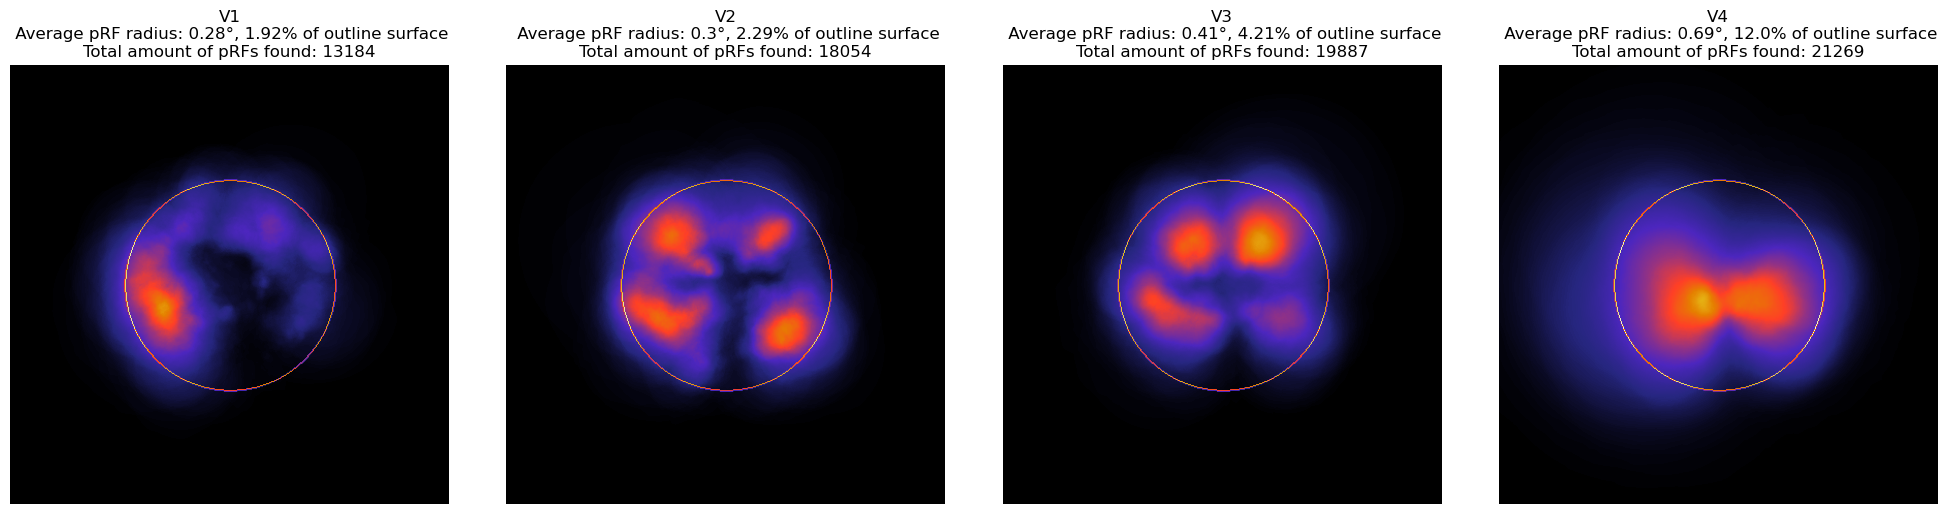

In [34]:
compare_heatmaps(n_prfs = 'all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'y')

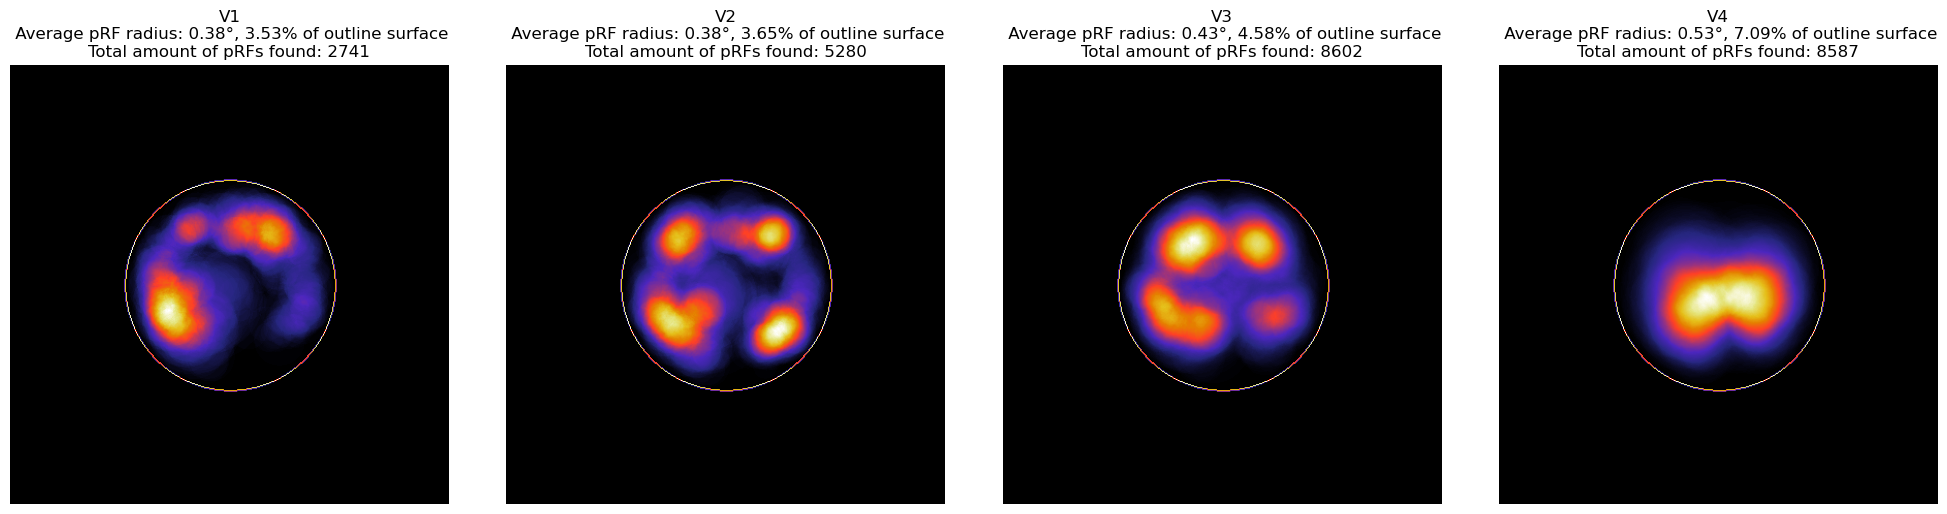

In [35]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0.1, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'n', ecc_strict = 'y')

What you see is that including a filter dict makes the code run a lot faster, which makes sense as you use only 1000 voxels instead of +-7500

Subject: subj01, Voxel 1 out of 10 found
Subject: subj01, Voxel 2 out of 10 found
Subject: subj01, Voxel 3 out of 10 found
Subject: subj01, Voxel 4 out of 10 found
Subject: subj01, Voxel 5 out of 10 found
Subject: subj01, Voxel 6 out of 10 found
Subject: subj01, Voxel 7 out of 10 found
Subject: subj01, Voxel 8 out of 10 found
Subject: subj01, Voxel 9 out of 10 found
Subject: subj01, Voxel 10 out of 10 found


Subject: subj02, Voxel 1 out of 10 found
Subject: subj03, Voxel 1 out of 10 found
Subject: subj03, Voxel 2 out of 10 found
Subject: subj03, Voxel 3 out of 10 found
Subject: subj03, Voxel 4 out of 10 found
Subject: subj03, Voxel 5 out of 10 found
Subject: subj03, Voxel 6 out of 10 found
Subject: subj03, Voxel 7 out of 10 found
Subject: subj03, Voxel 8 out of 10 found
Subject: subj03, Voxel 9 out of 10 found
Subject: subj03, Voxel 10 out of 10 found


Subject: subj04, Voxel 1 out of 10 found
Subject: subj04, Voxel 2 out of 10 found
Subject: subj04, Voxel 3 out of 10 found
Subject: s

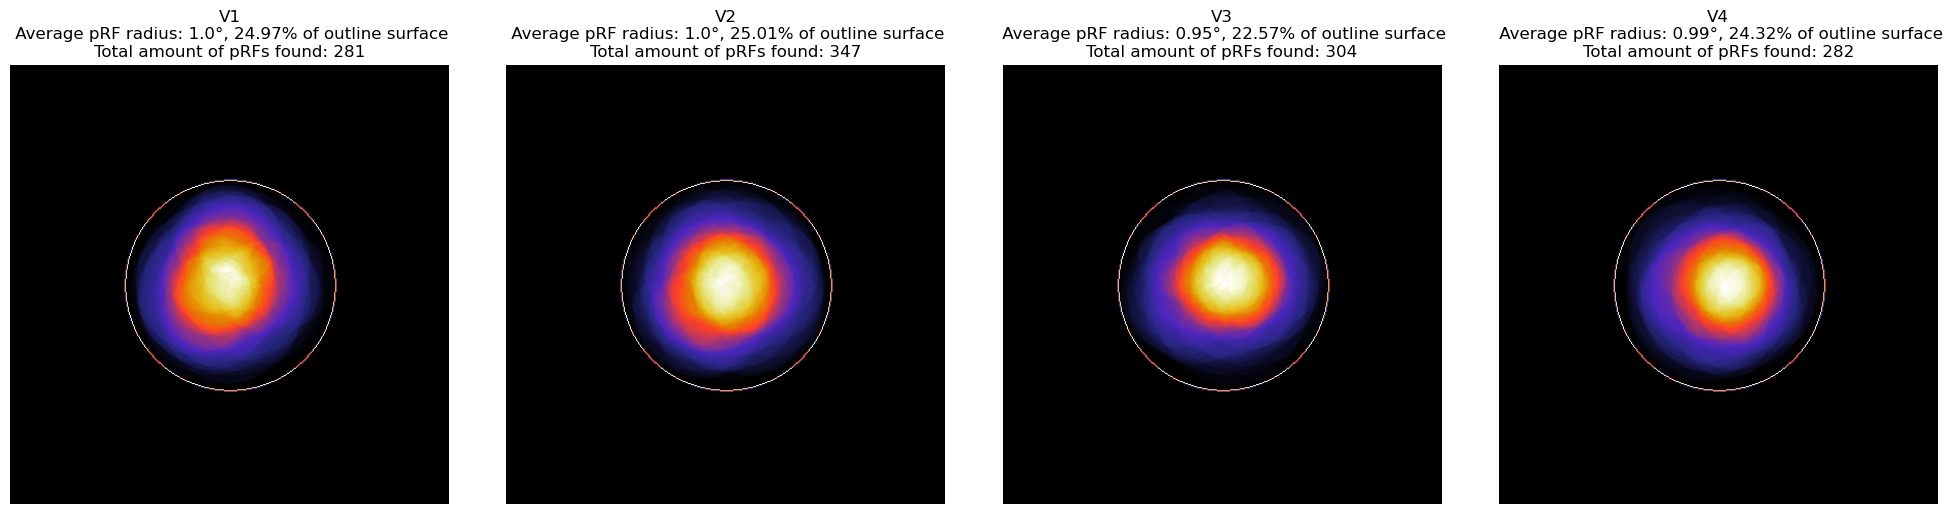

In [77]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .1, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = None, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [ ]:
kak = prf_plots_new(1, bottom_percent=10)

Subject: subj01, Voxel 1 out of 3976 found
Subject: subj01, Voxel 2 out of 3976 found
Subject: subj01, Voxel 3 out of 3976 found
Subject: subj01, Voxel 4 out of 3976 found
Subject: subj01, Voxel 5 out of 3976 found
Subject: subj01, Voxel 6 out of 3976 found
Subject: subj01, Voxel 7 out of 3976 found
Subject: subj01, Voxel 8 out of 3976 found
Subject: subj01, Voxel 9 out of 3976 found
Subject: subj01, Voxel 10 out of 3976 found
Subject: subj01, Voxel 11 out of 3976 found
Subject: subj01, Voxel 12 out of 3976 found
Subject: subj01, Voxel 13 out of 3976 found
Subject: subj01, Voxel 14 out of 3976 found
Subject: subj01, Voxel 15 out of 3976 found
Subject: subj01, Voxel 16 out of 3976 found
Subject: subj01, Voxel 17 out of 3976 found
Subject: subj01, Voxel 18 out of 3976 found
Subject: subj01, Voxel 19 out of 3976 found
Subject: subj01, Voxel 20 out of 3976 found
Subject: subj01, Voxel 21 out of 3976 found
Subject: subj01, Voxel 22 out of 3976 found
Subject: subj01, Voxel 23 out of 3976 fou

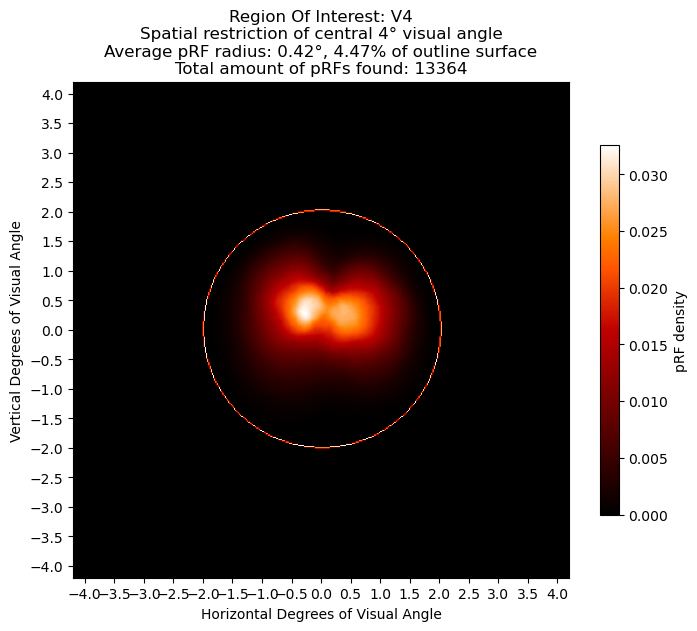

Runtime: 73.109 seconds
There were 997 out of 3976 pRFs considered


In [192]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V4', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = nsd_rsq_dict, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

Subject: subj01, Voxel 1 out of 3976 found
Subject: subj01, Voxel 2 out of 3976 found
Subject: subj01, Voxel 3 out of 3976 found
Subject: subj01, Voxel 4 out of 3976 found
Subject: subj01, Voxel 5 out of 3976 found
Subject: subj01, Voxel 6 out of 3976 found
Subject: subj01, Voxel 7 out of 3976 found
Subject: subj01, Voxel 8 out of 3976 found
Subject: subj01, Voxel 9 out of 3976 found
Subject: subj01, Voxel 10 out of 3976 found
Subject: subj01, Voxel 11 out of 3976 found
Subject: subj01, Voxel 12 out of 3976 found
Subject: subj01, Voxel 13 out of 3976 found
Subject: subj01, Voxel 14 out of 3976 found
Subject: subj01, Voxel 15 out of 3976 found
Subject: subj01, Voxel 16 out of 3976 found
Subject: subj01, Voxel 17 out of 3976 found
Subject: subj01, Voxel 18 out of 3976 found
Subject: subj01, Voxel 19 out of 3976 found
Subject: subj01, Voxel 20 out of 3976 found
Subject: subj01, Voxel 21 out of 3976 found
Subject: subj01, Voxel 22 out of 3976 found
Subject: subj01, Voxel 23 out of 3976 fou

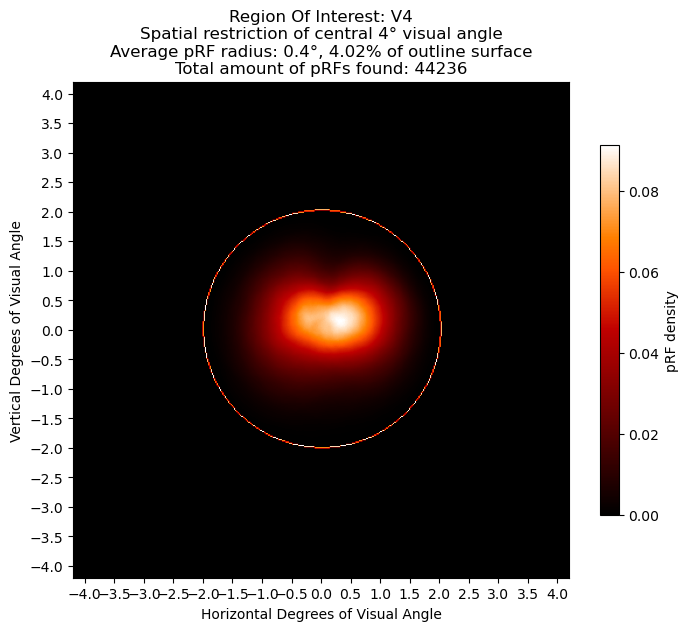

Runtime: 142.061 seconds
There were 2843 out of 3976 pRFs considered


In [193]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V4', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = None, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

(425, 425)


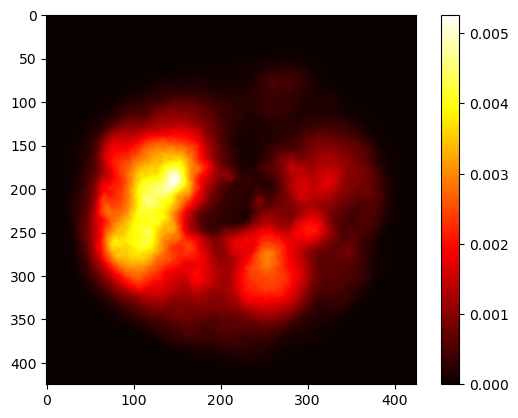

[[0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      

In [53]:
print(heatmap.shape)
# PERHAPS ADD AN OPTION IN THE HEATMAP FUNCTION TO DO THIS FILL SHIT<

middle_filter = make_circle_mask(425, 213, 213, 4 * 425/8.4, fill='y', margin_width = 1)

plt.imshow(np.flipud(middle_filter) * np.flipud(heatmap), cmap = 'hot')
plt.colorbar()
plt.show()
with np.printoptions(threshold=np.inf):
    print(np.flipud(middle_filter) * np.flipud(heatmap))




Subject: subj01, Voxel 1 out of 10 found
Subject: subj01, Voxel 2 out of 10 found
Subject: subj01, Voxel 3 out of 10 found
Subject: subj01, Voxel 4 out of 10 found
Subject: subj01, Voxel 5 out of 10 found
Subject: subj01, Voxel 6 out of 10 found
Subject: subj01, Voxel 7 out of 10 found
Subject: subj01, Voxel 8 out of 10 found
Subject: subj01, Voxel 9 out of 10 found
Subject: subj01, Voxel 10 out of 10 found


Subject: subj02, Voxel 1 out of 10 found
Subject: subj02, Voxel 2 out of 10 found
Subject: subj02, Voxel 3 out of 10 found
Subject: subj02, Voxel 4 out of 10 found
Subject: subj02, Voxel 5 out of 10 found
Subject: subj02, Voxel 6 out of 10 found
Subject: subj02, Voxel 7 out of 10 found
Subject: subj02, Voxel 8 out of 10 found
Subject: subj02, Voxel 9 out of 10 found
Subject: subj02, Voxel 10 out of 10 found


Subject: subj03, Voxel 1 out of 10 found
Subject: subj03, Voxel 2 out of 10 found
Subject: subj03, Voxel 3 out of 10 found
Subject: subj03, Voxel 4 out of 10 found
Subject: s

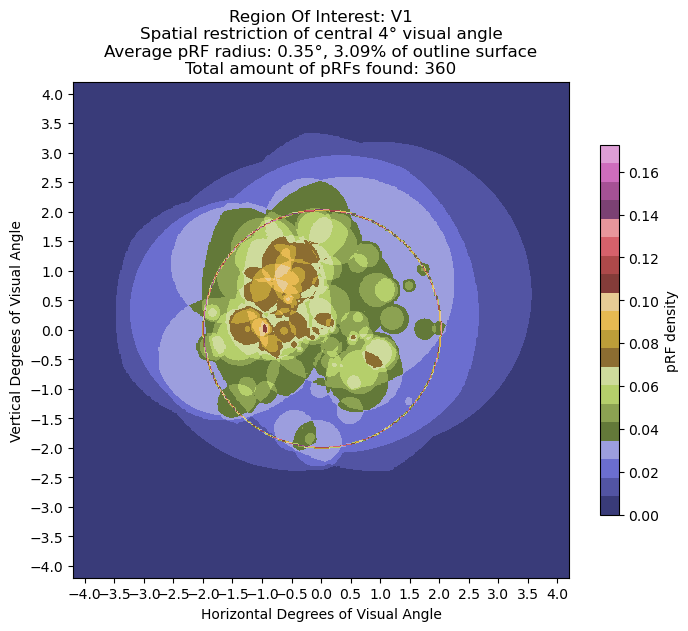

Runtime: 2.097 seconds
There were 21 out of 7887 pRFs considered


In [139]:
# Working heatmap call script.
from matplotlib.ticker import MultipleLocator

import time


start = time.time()

heatmap_full, iter, end_premat, roi, prf_sizes, avg_surf = prf_heatmap(10, binary_masks=vismask_dict, prf_proc_dict=prf_dict, 
                                                  mask_type='cut_gaussian', cmap='tab20b',print_prog='y', roi='V1', 
                                                  sigma_min=0, sigma_max=4.2, ecc_max = 2, subjects='all', 
                                                  outline_degs = 2, ecc_strict = 'n')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

(425, 425)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


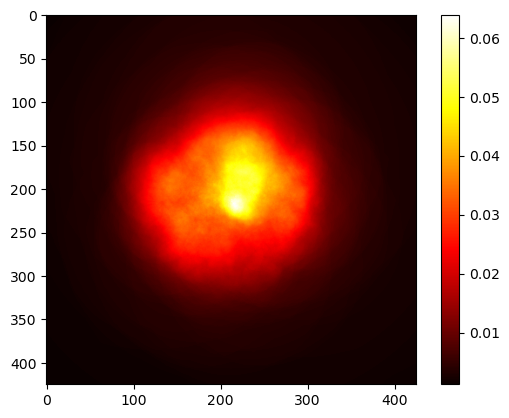

In [88]:
print(heatmap.shape)


middle_filter = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='y', margin_width = 100)


print(middle_filter)
# plt.imshow(np.flipud(middle_filter) + np.flipud(heatmap_full), cmap = 'tab10')
plt.imshow(heatmap_full - 1, cmap = 'hot')
plt.colorbar()
plt.show()
# with np.printoptions(threshold=np.inf):
#     print(np.flipud(middle_filter) * np.flipud(heatmap_full))




In [ ]:
# !{sys.executable} -m pip install nsdcode # This does not work, the ones below do
# !{sys.executable} -m pip install -r /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/requirements.txt
# !{sys.executable} -m pip install /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/.


In [ ]:

!{sys.executable} -m pip install numpy